In [ ]:
# Some imports that you might need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

import os

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import torch 
from torchvision.datasets.utils import download_url
import torchvision as tv
import torchvision.transforms as T
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torch.utils.data import Dataset, DataLoader, IterableDataset

import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Remeber to change the path here for the corresponding files you need
train = pd.read_csv('/content/drive/MyDrive/519_Project/cassava-leaf-disease-classification/train.csv')
test = pd.read_csv('/content/drive/MyDrive/519_Project/cassava-leaf-disease-classification/sample_submission.csv')
label_map = pd.read_json('/content/drive/MyDrive/519_Project/cassava-leaf-disease-classification/label_num_to_disease_map.json', 
                         orient='index')
display(train.head())
display(test.head())
display(label_map)

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


,image_id,label
0,2216849948.jpg,4


,0
0,Cassava Bacterial Blight (CBB)
1,Cassava Brown Streak Disease (CBSD)
2,Cassava Green Mottle (CGM)
3,Cassava Mosaic Disease (CMD)
4,Healthy


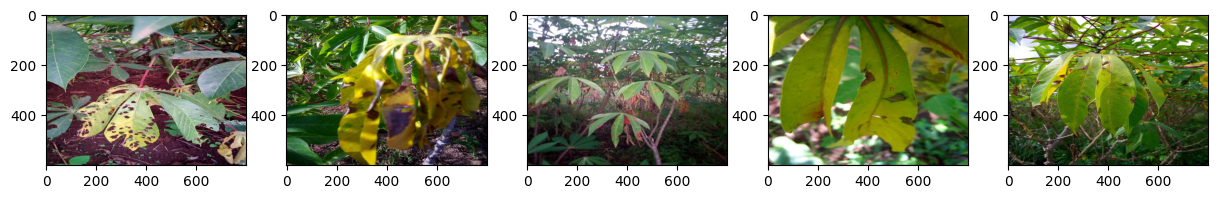

In [ ]:
sample0 = train[train.label == 0].sample(5)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample0.image_id, sample0.label)):
    plt.subplot(1, 5, ind + 1)
    img = cv2.imread(os.path.join('/content/drive/MyDrive/519_Project/cassava-leaf-disease-classification/', "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
plt.show()

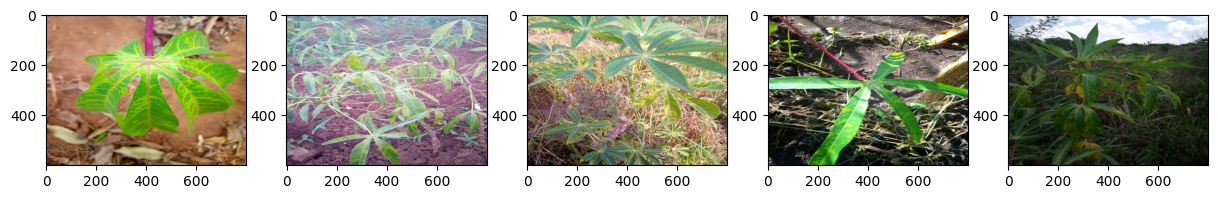

In [ ]:
sample1 = train[train.label == 1].sample(5)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample1.image_id, sample1.label)):
    plt.subplot(1, 5, ind + 1)
    img = cv2.imread(os.path.join('/content/drive/MyDrive/519_Project/cassava-leaf-disease-classification/', "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
plt.show()

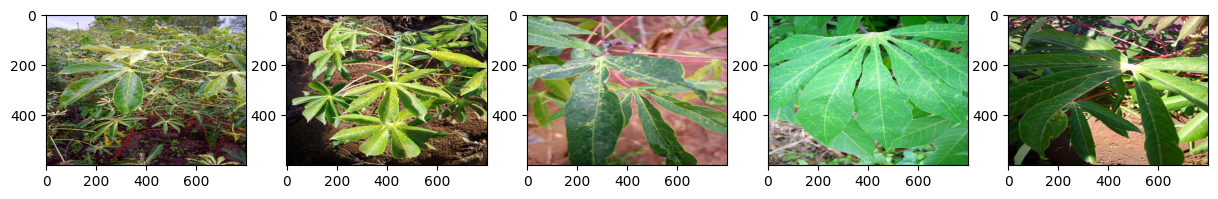

In [ ]:
sample2 = train[train.label == 2].sample(5)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample2.image_id, sample2.label)):
    plt.subplot(1, 5, ind + 1)
    img = cv2.imread(os.path.join('/content/drive/MyDrive/519_Project/cassava-leaf-disease-classification/', "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
plt.show()

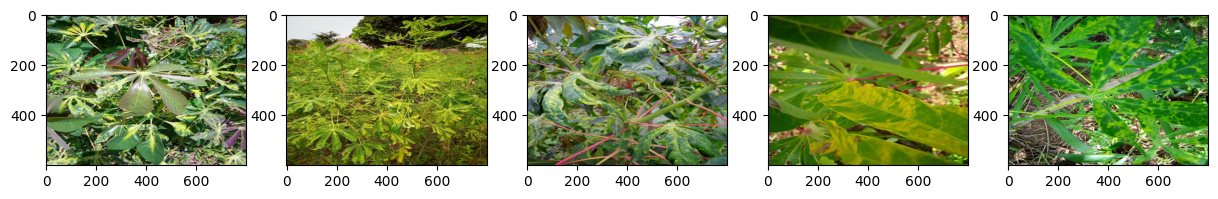

In [ ]:
sample3 = train[train.label == 3].sample(5)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample3.image_id, sample3.label)):
    plt.subplot(1, 5, ind + 1)
    img = cv2.imread(os.path.join('/content/drive/MyDrive/519_Project/cassava-leaf-disease-classification/', "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
plt.show()

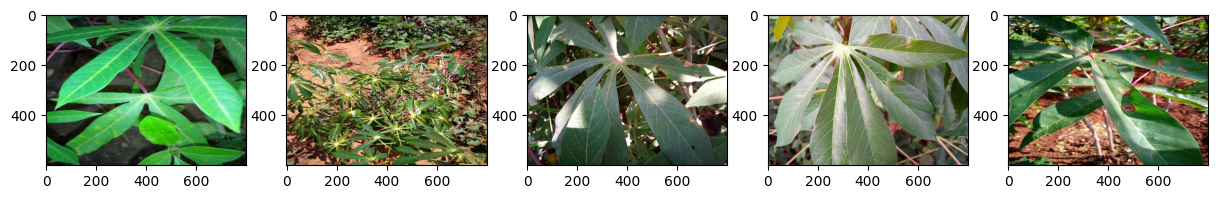

In [ ]:
sample4 = train[train.label == 4].sample(5)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample4.image_id, sample4.label)):
    plt.subplot(1, 5, ind + 1)
    img = cv2.imread(os.path.join('/content/drive/MyDrive/519_Project/cassava-leaf-disease-classification/', "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
plt.show()

In [ ]:
distribution = label_map.reset_index().merge(train.groupby(['label']).count().reset_index(), left_on='index', right_on='label').drop(columns=['index'])
distribution['proportion'] = distribution['image_id'] / distribution['image_id'].sum()
distribution

,0,label,image_id,proportion
0,Cassava Bacterial Blight (CBB),0,1087,0.050802
1,Cassava Brown Streak Disease (CBSD),1,2189,0.102304
2,Cassava Green Mottle (CGM),2,2386,0.111511
3,Cassava Mosaic Disease (CMD),3,13158,0.614946
4,Healthy,4,2577,0.120437
